# ***Preprocessing*** and Loading

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

#***Preprocessing***

import os
import cv2
from sklearn.utils import shuffle
import numpy as np

%cd /content/gdrive/MyDrive/colab_notebooks/animal_dataset/animals

# Function to load images and their respective labels
def load_img(directory):
    Images = []
    Labels = []

    for labels in os.listdir(directory):
        # Assign a label based on the folder name
        if labels == 'butterfly':
            label = 0
        elif labels == 'cat':
            label = 1
        elif labels == 'elephant':
            label = 2
        elif labels == 'horse':
            label = 3
        else:
            continue  # Skip any folders that are not recognized

        # Iterate over each image file in the label folder
        for image_file in os.listdir(os.path.join(directory, labels)):
            image_path = os.path.join(directory, labels, image_file)
            image = cv2.imread(image_path)

            # Check if the image was loaded successfully
            if image is None:
                continue  # Skip files that couldn't be read

            # Resize the image to 128x128 pixels
            image = cv2.resize(image, (128, 128))

            Images.append(image)
            Labels.append(label)

    return shuffle(Images, Labels, random_state=40)

directory = %pwd
directory





Mounted at /content/gdrive
/content/gdrive/MyDrive/colab_notebooks/animal_dataset/animals


'/content/gdrive/MyDrive/colab_notebooks/animal_dataset/animals'

In [2]:
def get_classlabel(class_code):
    labels = {0: 'butterfly',
              1: 'cat',
              2: 'elephant',
              3: 'horse'}
    return labels[class_code]

In [3]:
# Load the images and labels
Img_data, Label_data = load_img('/content/gdrive/MyDrive/colab_notebooks/animal_dataset/animals')

# Convert images to numpy arrays for further processing (e.g., training a model)
Img_data = np.array(Img_data)
Label_data = np.array(Label_data)

In [4]:
Img_np = np.array(Img_data)

Label_np = np.array(Label_data)

print(Img_np.shape)
print(Label_np.shape)


# Create the directory if it doesn't exist
output_dir = '/content/gdrive/MyDrive/colab_notebooks/animal_dataset_numpy'
os.makedirs(output_dir, exist_ok=True)

# Save the NumPy arrays
np.save(os.path.join(output_dir, 'Images.npy'), Img_np)
np.save(os.path.join(output_dir, 'Labels.npy'), Label_np)

loaded_images = np.load('/content/gdrive/MyDrive/colab_notebooks/animal_dataset_numpy/Images.npy')
loaded_labels = np.load('/content/gdrive/MyDrive/colab_notebooks/animal_dataset_numpy/Labels.npy')


(240, 128, 128, 3)
(240,)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


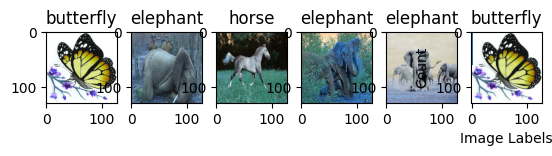

{0: 60, 1: 60, 2: 60, 3: 60}
(240, 128, 128, 3)
(240,)


In [6]:
from random import randint
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 6)
for i in range(0, 6):
    rnd_number = randint(0, len(loaded_labels))
    ax[i].imshow(loaded_images[rnd_number])
    ax[i].set_title(get_classlabel(loaded_labels[rnd_number]))

label_values, count = np.unique(loaded_labels, return_counts=True)
distribution = dict(zip(label_values, count))

plt.bar(list(distribution.keys()), distribution.values(), width=0.6)

plt.xlabel('Image Labels')
plt.ylabel('Count')
plt.show()

print(distribution)

print(loaded_images.shape)
print(loaded_labels.shape)

# ***CNN Training***


In [7]:

from sklearn.datasets import fetch_openml

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from random import randint

In [8]:
from google.colab import drive
drive.flush_and_unmount()  # Unmounts the drive to reset the connec tion
drive.mount('/content/gdrive')  # Re-mount the drive

Mounted at /content/gdrive


(179, 128, 128, 3) (35, 128, 128, 3) (26, 128, 128, 3)
(179,) (35,) (26,)


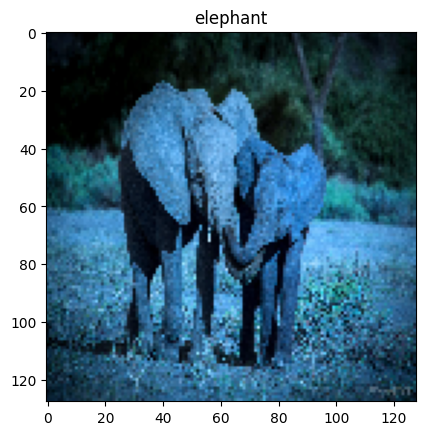

In [9]:
output_dir = '/content/gdrive/MyDrive/animal_dataset_numpy/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

rnd_number = randint(0, len(loaded_labels))
plt.imshow(loaded_images[rnd_number])
plt.title(get_classlabel(loaded_labels[rnd_number]))

X_train, X_test, y_train, y_test = train_test_split(loaded_images, loaded_labels, test_size=1/7, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)


# Create the directory if it doesn't exist
output_dir = '/content/gdrive/MyDrive/colab_notebooks/animal_dataset_numpy'

# Save the NumPy arrays
np.save(os.path.join(output_dir, 'X_test_data.npy'), X_test)
np.save(os.path.join(output_dir, 'y_test_data.npy'), y_test)


In [10]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Activation, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dropout, Flatten, BatchNormalization

model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a new Conv2D layer here
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

model.add(Dense(6, activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │         196,614 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289,862 (1.11 MB)

 Trainable params: 289,862 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
#sgd = SGD(learning_rate = 0.001)


model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32') / 255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32') / 255.0
y_val = y_val.astype('uint')



model.fit(X_train, y_train, batch_size=60, epochs=8, validation_data=(X_val, y_val))


Epoch 1/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.1567 - loss: 1.7920 - val_accuracy: 0.2308 - val_loss: 1.4302
Epoch 2/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3766 - loss: 1.4372 - val_accuracy: 0.4615 - val_loss: 1.4797
Epoch 3/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5007 - loss: 1.3592 - val_accuracy: 0.2692 - val_loss: 1.3658
Epoch 4/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4582 - loss: 1.2963 - val_accuracy: 0.5385 - val_loss: 1.2570
Epoch 5/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6114 - loss: 1.1801 - val_accuracy: 0.4231 - val_loss: 1.2001
Epoch 6/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5905 - loss: 1.0253 - val_accuracy: 0.5769 - val_loss: 1.0709
Epoch 7/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7186 - loss: 0.8741 - val_accuracy: 0.4231 - val_loss: 1.1351
Epoch 8/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6713 - loss: 0.8307 - val_accuracy: 0.6538 - val_loss: 0.9088


In [12]:
from google.colab import drive
drive.flush_and_unmount()  # Unmounts the drive to reset the connection
drive.mount('/content/gdrive')  # Re-mount the drive

Mounted at /content/gdrive


CNN Inference **

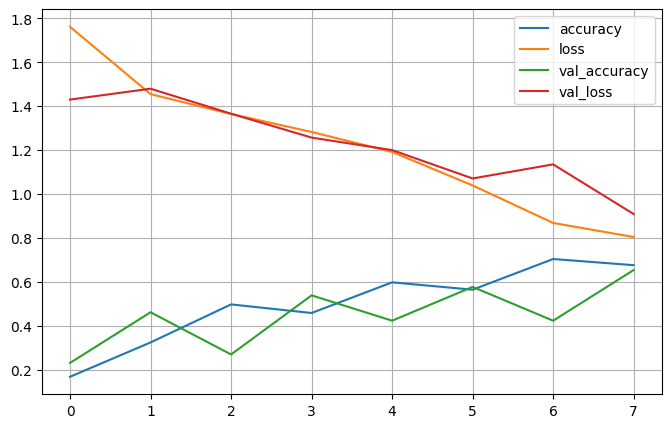

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │         196,614 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 869,588 (3.32 MB)

 Trainable params: 289,862 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 579,726 (2.21 MB)

In [13]:
import pandas as pd
from tensorflow.keras.models import load_model
import os

pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

#!mkdir -p saved_model

output_dir = '/content/gdrive/MyDrive/colab_notebooks/animal_dataset_numpy/RA_CNN'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# DOES NOT WORK
model_path = os.path.join(output_dir, 'RA_CNN.keras')
model.save(model_path)  # Save as .keras format (recommended for Keras 3)

trained_model = load_model(model_path)
#trained_model = tf.keras.models.load_model('/content/gdrive/MyDrive/colab_notebooks/animal_dataset_numpy/RA_CNN')

trained_model.summary()

In [14]:
loaded_X_test = np.load('/content/gdrive/MyDrive/colab_notebooks/animal_dataset_numpy/X_test_data.npy')
loaded_y_test = np.load('/content/gdrive/MyDrive/colab_notebooks/animal_dataset_numpy/y_test_data.npy')

# Inference
X_test = loaded_X_test.astype('float32') / 255.0
y_test = loaded_y_test.astype('uint')

loss, acc = trained_model.evaluate(X_test, y_test, verbose=1)

print('Accuracy: %.3f' % acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - accuracy: 0.6083 - loss: 0.8816
Accuracy: 0.600


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predicted probabilities
y_proba = trained_model.predict(X_test)

# Convert probabilities to class labels by taking the index of the highest probability
y_pred = np.argmax(y_proba, axis=1)

# Print the Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))  # Make sure y_test is the true labels

# Print the Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred))

# Print trainable parameters
print(trained_model.trainable_variables)  # Trained Parameters


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Confusion Matrix
[[10  2  2  0]
 [ 0  6  0  0]
 [ 2  2  3  0]
 [ 0  3  3  2]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.46      1.00      0.63         6
           2       0.38      0.43      0.40         7
           3       1.00      0.25      0.40         8

    accuracy                           0.60        35
   macro avg       0.67      0.60      0.55        35
weighted avg       0.72      0.60      0.59        35

[<KerasVariable shape=(3, 3, 3, 32), dtype=float32, path=conv2d/kernel>, <KerasVariable shape=(32,), dtype=float32, path=conv2d/bias>, <KerasVariable shape=(3, 3, 32, 64), dtype=float32, path=conv2d_1/kernel>, <KerasVariable shape=(64,), dtype=float32, path=conv2d_1/bias>, <KerasVariable shape=(3, 3, 64, 128), dtype=float32, path=conv2d_2/kernel>, <KerasVariable shape=(128,), dtype=float32, path=conv2d_2/bias>, <KerasVaria

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Path to the new image
def detect_animal(img_path):  # Replace this with your image path
  # Step 1: Load and preprocess the image
  img = load_img(img_path, target_size=(128, 128))  # Resize to match model's input shape
  img_array = img_to_array(img)  # Convert to numpy array
  img_array = img_array.astype('float32') / 255.0  # Normalize pixel values if needed

  # Step 2: Add a batch dimension (model expects a batch of images)
  img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 128, 128, 3)

  # Step 3: Use the model to predict the class
  predictions = trained_model.predict(img_array)
  predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class with the highest probability

  # Optional: Define a dictionary to map class indices to labels
  class_labels = {0: 'butterfly',
                  1: 'cat',
                  2: 'elephant',
                  3: 'horse'}
  predicted_label = class_labels.get(predicted_class, "Unknown")

  # Step 4: Display the result
  plt.imshow(img)
  plt.title(f'Predicted: {predicted_label}')
  plt.axis('off')
  plt.show()

Unseen Data Attempt!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


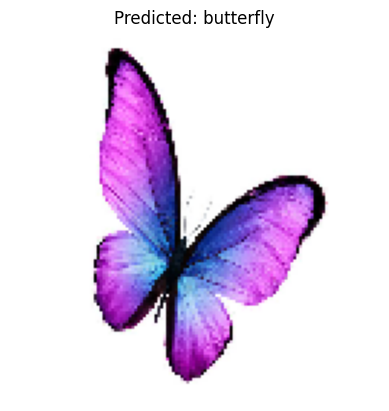

In [17]:
detect_animal('/content/gdrive/MyDrive/colab_notebooks/animal_dataset/animals_unseen/butterfly_1.jpg')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


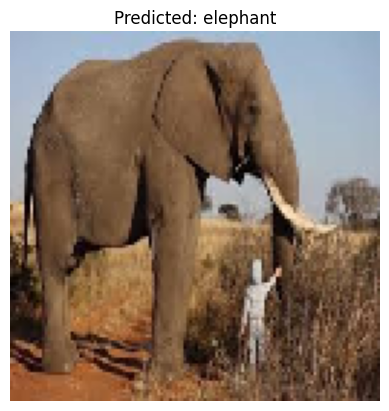

In [19]:
detect_animal('/content/gdrive/MyDrive/colab_notebooks/animal_dataset/animals/elephant/0f3f8d6a15.jpg')